# Times Higher Education Ranking - Clustering

### Introduction:
In this study, we performed a comprehensive analysis of universities worldwide, taking into account not only their rankings, but also a diverse
set of criteria that capture the multifaceted nature of higher education institutions.

The dataset used was based on the Times Higher Education World University Rankings, one of the most influential and widely observed university
measurement systems globally. The data covered the past 9 years of rankings.

Specifically, we examined factors such as research environment, teaching standards, hospitality for international students, and industry income, in addition to the universities’ overall performance scores. Furthermore, we conducted a comparative analysis of universities within Turkiye to gain insights into the relative strengths and weaknesses of the Turkish higher education system.

To achieve the objectives of this study, we will utilize clustering algorithms to group the universities based on their similarities or dissimilarities across the selected variables.

### Import Libraries

In [1]:
# For data manipulation and analysis
import pandas as pd 
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# For numerical operations
import numpy as np
# Ignore all warning messages
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df=pd.read_csv('THE World University Rankings 2016-2024.csv', encoding='latin-1')
# The "encoding='latin-1'" parameter is used to handle the file encoding, which may be different from the default encoding.

### Exploratory Data Analysis

#### Step I. Preliminary Examination

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

Rank                                   Name         Country  \
0   1.0     California Institute of Technology   United States   
1   2.0                   University of Oxford  United Kingdom   
2   3.0                    Stanford University   United States   
3   4.0                University of Cambridge  United Kingdom   
4   5.0  Massachusetts Institute of Technology   United States   

   Student Population  Students to Staff Ratio International Students  \
0                2243                      6.9                    26%   
1               19920                     11.6                    34%   
2               15596                      7.8                    22%   
3               18810                     11.8                    34%   
4               11074                      9.0                    33%   

  Female to Male Ratio  Overall Score  Teaching  Research Environment  \
0              33 : 67           95.2      95.6                  97.6   
1             46:54:00           94.2      86.5                  98.9   
2             42:58:00           93.9      92.5                  96.2   
3             46:54:00           92.8      88.2                  96.7   
4              37 : 63           92.0      89.4                  88.6   

   Research Quality  Industry Impact  International Outlook  Year  
0              99.8             97.8                   64.0  2016  
1              98.8             73.1                   94.4  2016  
2              99.9             63.3                   76.3  2016  
3              97.0             55.0                   91.5  2016  
4              99.7             95.4                   84.0  2016

In [4]:
# Display the last 5 rows of the DataFrame
df.tail() 

Rank                                             Name  \
12425  1900.0                           Penza State University   
12426  1901.0  Universidad Peruana de Ciencias Aplicadas (UPC)   
12427  1902.0         Universidade Federal Rural do Semi-Arido   
12428  1903.0                        State University of Bahia   
12429  1904.0                            Tula State University   

                  Country  Student Population  Students to Staff Ratio  \
12425  Russian Federation               17934                     17.2   
12426                Peru               56595                     21.1   
12427              Brazil                8687                     12.4   
12428              Brazil               25067                     11.9   
12429  Russian Federation               18428                     35.0   

      International Students Female to Male Ratio  Overall Score  Teaching  \
12425                    12%             56:44:00        12.1935      14.3   
12426                     1%             50:50:00        12.1470      13.5   
12427                     0%             49:51:00        11.9910      19.1   
12428                     0%             66:34:00        11.5655      19.3   
12429                     3%             60:40:00         9.6910      11.6   

       Research Environment  Research Quality  Industry Impact  \
12425                   8.7               7.8             16.3   
12426                   8.7              10.1             15.6   
12427                   9.0               5.7             16.6   
12428                   8.6               4.1             16.2   
12429                   9.0               5.1             17.6   

       International Outlook  Year  
12425                   32.8  2024  
12426                   26.5  2024  
12427                   18.3  2024  
12428                   20.0  2024  
12429                   19.0  2024

In [5]:
# Get the number of rows and columns in the DataFrame
df.shape

(12430, 14)

In [6]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     12430 non-null  float64
 1   Name                     12430 non-null  object 
 2   Country                  12430 non-null  object 
 3   Student Population       12430 non-null  int64  
 4   Students to Staff Ratio  12430 non-null  float64
 5   International Students   12430 non-null  object 
 6   Female to Male Ratio     11839 non-null  object 
 7   Overall Score            12430 non-null  float64
 8   Teaching                 12430 non-null  float64
 9   Research Environment     12430 non-null  float64
 10  Research Quality         12430 non-null  float64
 11  Industry Impact          12430 non-null  float64
 12  International Outlook    12430 non-null  float64
 13  Year                     12430 non-null  int64  
dtypes: float64(8), int64(2

In [7]:
# Determine the number of unique values in the 'Country' column
len(df['Country'].unique())

108

In [8]:
# Determine the number of unique values in the 'Name' column
len(df['Name'].unique()) 

2105

In [9]:
# Determine the number of unique values in the 'International Students' column
df["International Students"].unique()

array(['26%', '34%', '22%', '33%', '25%', '27%', '51%', '37%', '20%',
       '23%', '15%', '46%', '28%', '19%', '17%', '16%', '35%', '70%',
       '36%', '13%', '54%', '18%', '11%', '14%', '10%', '38%', '9%',
       '21%', '7%', '8%', '12%', '24%', '6%', '29%', '32%', '47%', '48%',
       '31%', '40%', '30%', '5%', '4%', '39%', '1%', '52%', '2%', '0%',
       '3%', '63%', '44%', '43%', '50%', '42%', '82%', '55%', '62%', '%',
       '77%', '49%', '45%', '41%', '84%', '71%', '57%', '64%', '53%',
       '56%', '61%', '68%', '69%', '59%', '65%', '79%', '76%', '67%',
       '60%', '83%', '58%', '72%', '81%', '66%', '88%', '78%', '86%',
       '73%', '91%', '92%', '75%', '74%'], dtype=object)

In [10]:
# Update the 'International Students' column by removing the '%' symbol from the values
df["International Students"] = df["International Students"].str.rstrip("%")

# Replace any empty values in the 'International Students' column with '0'
df["International Students"].replace('', '0', inplace=True)

# Convert the 'International Students' column to float data type
df["International Students"] = df["International Students"].astype(float)

# Calculate the number of international students based on the 'Student Population' and 'International Students' columns
df['International Students']=((df['Student Population']*df['International Students'])/100).round()

#### Step II. Handling Missing Values

In [11]:
# Check the number of missing values in each column
df.isnull().sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio       591
Overall Score                0
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact              0
International Outlook        0
Year                         0
dtype: int64

In [12]:
# Calculate the unique values and their counts in the 'Female to Male Ratio' column
df['Female to Male Ratio'].value_counts()

Female to Male Ratio
55:45:00       602
56:44:00       588
54:46:00       547
53:47:00       545
57:43:00       542
              ... 
0.35625          1
88:12:00         1
0.151388889      1
95:05:00         1
99:01:00         1
Name: count, Length: 90, dtype: int64

In [13]:
# Remove the ":00" suffix from the 'Female to Male Ratio' column values
df["Female to Male Ratio"] = df["Female to Male Ratio"].str.replace(":00", "")

# Split the 'Female to Male Ratio' column values into a list if they are strings
df["Female to Male Ratio"] = df["Female to Male Ratio"].apply(lambda x: x.split(":") if isinstance(x, str) else None)

# Calculate the ratio by dividing the first element by the second element of the list
df["Female to Male Ratio"] = df["Female to Male Ratio"].apply(lambda x: float(x[0]) / float(x[1]) if isinstance(x, list) and len(x) == 2 else None)

# Fill any remaining NaN values in the 'Female to Male Ratio' column with 0
df['Female to Male Ratio'].fillna(0, inplace=True)

In [14]:
df.isnull().sum() 

Rank                       0
Name                       0
Country                    0
Student Population         0
Students to Staff Ratio    0
International Students     0
Female to Male Ratio       0
Overall Score              0
Teaching                   0
Research Environment       0
Research Quality           0
Industry Impact            0
International Outlook      0
Year                       0
dtype: int64

#### Step III. Summarizing Data

In [15]:
# Generate descriptive statistics for the DataFrame
df.describe()

Rank  Student Population  Students to Staff Ratio  \
count  12430.000000        1.243000e+04             12430.000000   
mean     736.831054        2.336700e+04                18.897812   
std      467.960733        3.498715e+04                17.057811   
min        1.000000        2.500000e+01                 0.300000   
25%      346.000000        1.014950e+04                12.300000   
50%      691.000000        1.782400e+04                16.300000   
75%     1078.000000        2.921850e+04                22.000000   
max     1904.000000        1.824383e+06               865.800000   

       International Students  Female to Male Ratio  Overall Score  \
count            12430.000000          12430.000000   12430.000000   
mean              2252.120274              1.072296      35.333011   
std               2798.254404              1.229543      16.883561   
min                  0.000000              0.000000       8.222500   
25%                370.000000              0.694915      21.731875   
50%               1239.500000              1.083333      32.402750   
75%               3160.000000              1.380952      45.189375   
max              29281.000000             99.000000      98.457500   

           Teaching  Research Environment  Research Quality  Industry Impact  \
count  12430.000000          12430.000000      12430.000000     12430.000000   
mean      28.536669             24.108640         49.188648        46.505502   
std       14.061391             17.598593         27.534337        18.695916   
min        8.200000              0.800000          0.700000         0.000000   
25%       18.800000             11.700000         24.500000        35.300000   
50%       24.300000             18.100000         47.450000        39.500000   
75%       33.800000             30.500000         72.975000        52.200000   
max       99.000000            100.000000        100.000000       100.000000   

       International Outlook          Year  
count           12430.000000  12430.000000  
mean               47.604875   2020.664200  
std                23.002701      2.483259  
min                 7.100000   2016.000000  
25%                28.225000   2019.000000  
50%                43.300000   2021.000000  
75%                63.600000   2023.000000  
max               100.000000   2024.000000

#### Step IV. Data Visualization

Text(0.5, 1.0, 'Distribution of Rank Values')

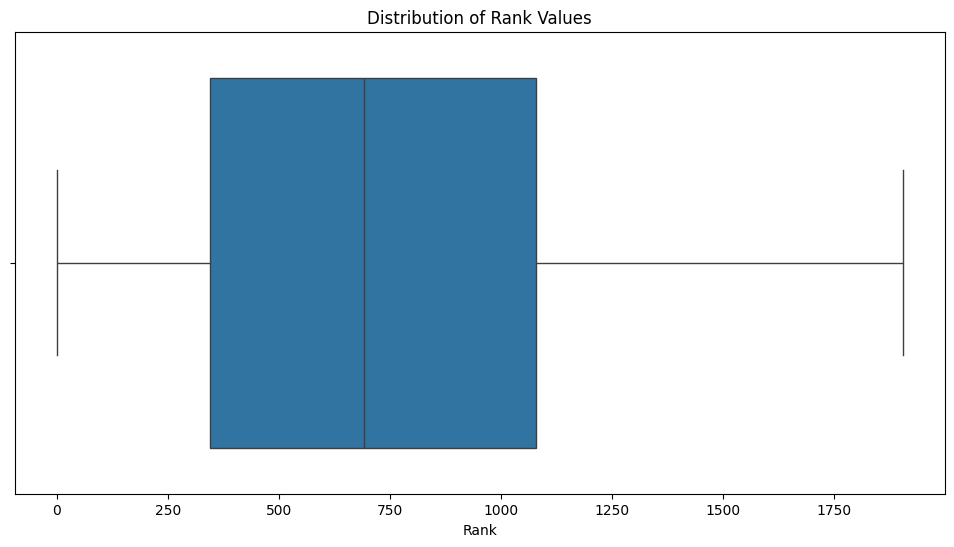

In [16]:
# Create the box plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Rank', data=df, ax=ax)

# Add a title to the plot
ax.set_title('Distribution of Rank Values')  # Add a title to the plot

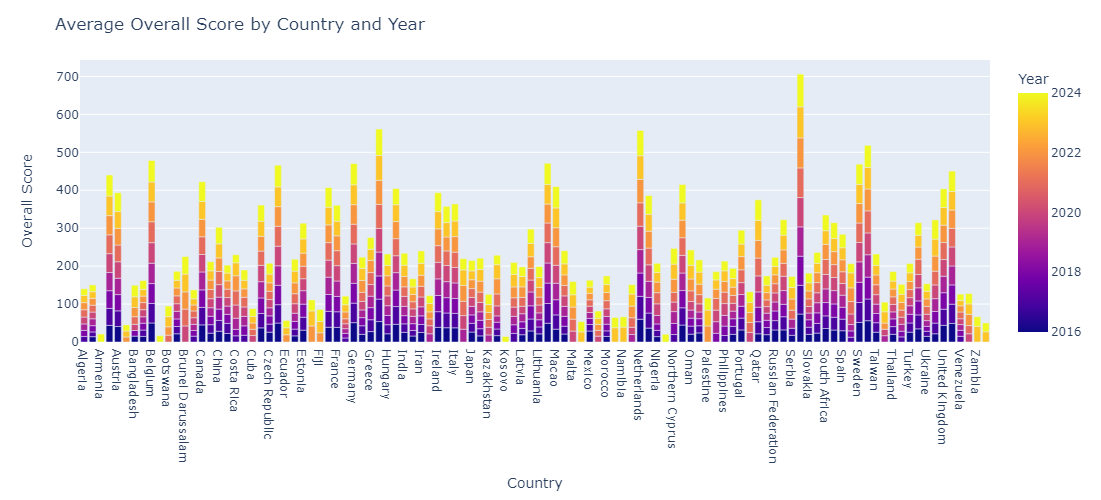

In [17]:
# Group the data by 'Country' and 'Year', and calculate the mean of 'Overall Score'
grouped_data = df.groupby(['Country', 'Year'])['Overall Score'].mean().reset_index()

# Create the Plotly bar chart
fig = px.bar(grouped_data, x='Country', y='Overall Score', color='Year')

# Customize the layout of the chart
fig.update_layout(
    width=1000,  # Set the width of the chart to 1000 pixels
    height=500,  # Set the height of the chart to 500 pixels
    title='Average Overall Score by Country and Year'  # Add a title to the chart
)

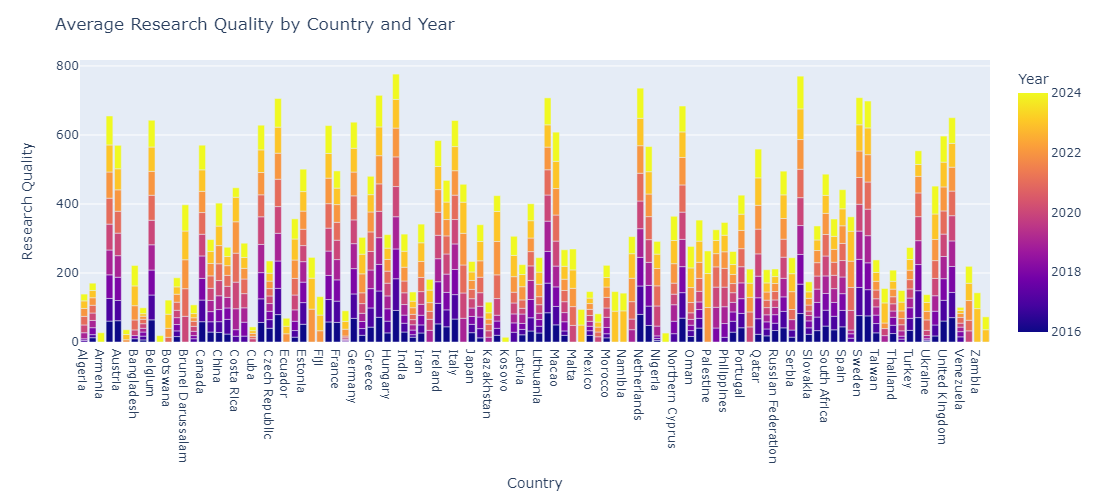

In [18]:
# Group the data by 'Country' and 'Year', and calculate the mean 'Research Quality' for each group
grouped_data = df.groupby(['Country', 'Year'])['Research Quality'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(grouped_data, x='Country', y='Research Quality', color='Year')

# Update the layout of the chart
fig.update_layout(
    width=1000,  # Set the width of the chart
    height=500,  # Set the height of the chart
    title='Average Research Quality by Country and Year'  # Add a title to the chart
)

# The `px.bar()` function creates a bar chart, where the 'Country' column is used for the x-axis, the 'Research Quality' column is used for the y-axis, and the 'Year' column is used to color the bars.
# The `update_layout()` function is used to set the width and height of the chart, as well as add a title to the chart.

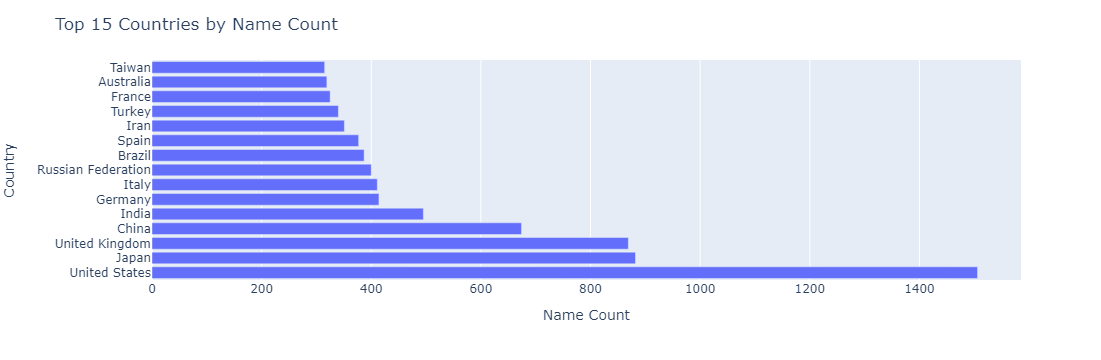

In [19]:
# Group the data by 'Country' and count the number of 'Name' values for each country
top_15_countries = df.groupby(['Country'])['Name'].count().sort_values(ascending=False).head(15)

# Create the Plotly bar chart
fig = px.bar(top_15_countries, 
              x=top_15_countries.values,  # Use the 'Name Count' values for the x-axis
              y=top_15_countries.index,  # Use the 'Country' values for the y-axis
              labels={'x':'Name Count', 'y':'Country'})  # Set the axis labels

# Add a title to the chart
fig.update_layout(title='Top 15 Countries by Name Count')

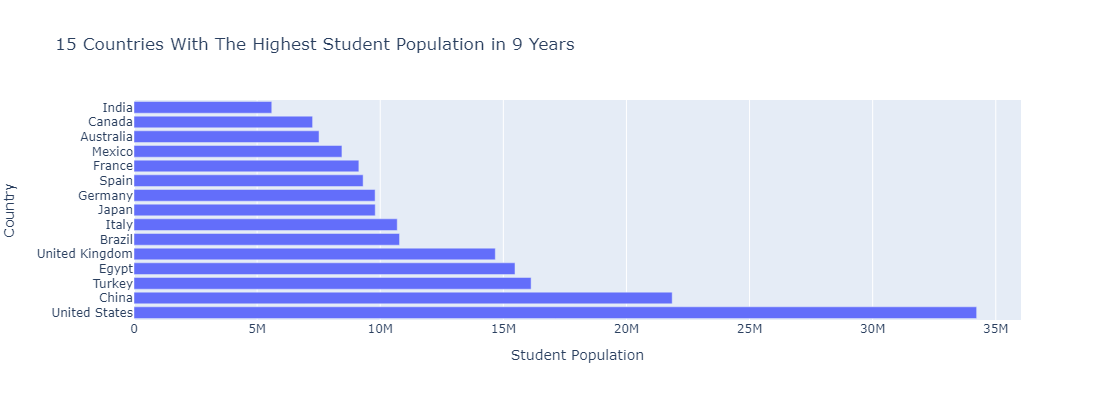

In [20]:
# Group the data by 'Country' and sum the 'Student Population' values, then sort and take the top 15
top_15_s_p = df.groupby('Country')['Student Population'].sum().reset_index().sort_values('Student Population', ascending=False).head(15)

# Create the Plotly bar chart
px.bar(top_15_s_p, 
              x='Student Population',  # Use the 'Student Population' values for the x-axis
              y='Country',  # Use the 'Country' values for the y-axis
              title='15 Countries With The Highest Student Population in 9 Years',  # Add a title to the chart
              height=400,  # Set the height of the chart to 400 pixels
              width=700)  # Set the width of the chart to 700 pixels

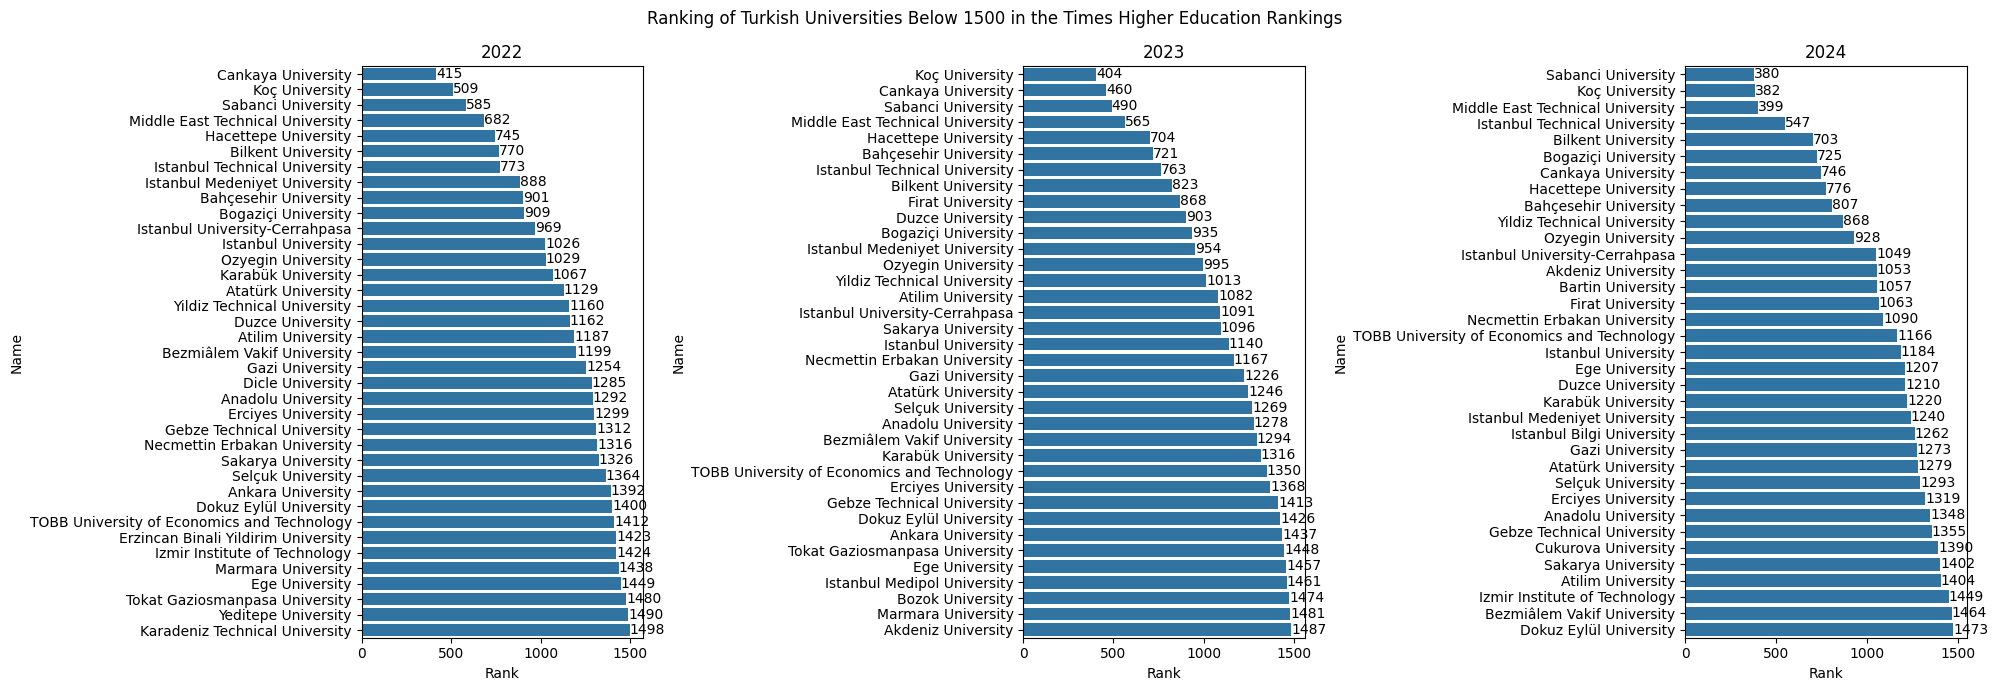

In [21]:
# Filter the data to include only Turkish universities
filtered_country = df[df['Country'] == 'Turkey']

# Filter the data to include only universities ranked below 1500
filtered_rank = filtered_country[filtered_country['Rank'] < 1500]

# Extract the data for each year
year_2022 = filtered_rank[filtered_rank['Year'] == 2022]
year_2023 = filtered_rank[filtered_rank['Year'] == 2023]
year_2024 = filtered_rank[filtered_rank['Year'] == 2024]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Plot the 2022 data
ax = sns.barplot(x=year_2022['Rank'], y=year_2022['Name'], ax=axes[0])
ax.bar_label(axes[0].containers[0])
axes[0].set_title('2022')

# Plot the 2023 data
ax = sns.barplot(x=year_2023['Rank'], y=year_2023['Name'], ax=axes[1])
ax.bar_label(axes[1].containers[0])
axes[1].set_title('2023')

# Plot the 2024 data
ax = sns.barplot(x=year_2024['Rank'], y=year_2024['Name'], ax=axes[2])
ax.bar_label(axes[2].containers[0])
axes[2].set_title('2024')

# Add a common title for the figure
plt.suptitle('Ranking of Turkish Universities Below 1500 in the Times Higher Education Rankings')

# Adjust the layout
plt.tight_layout()

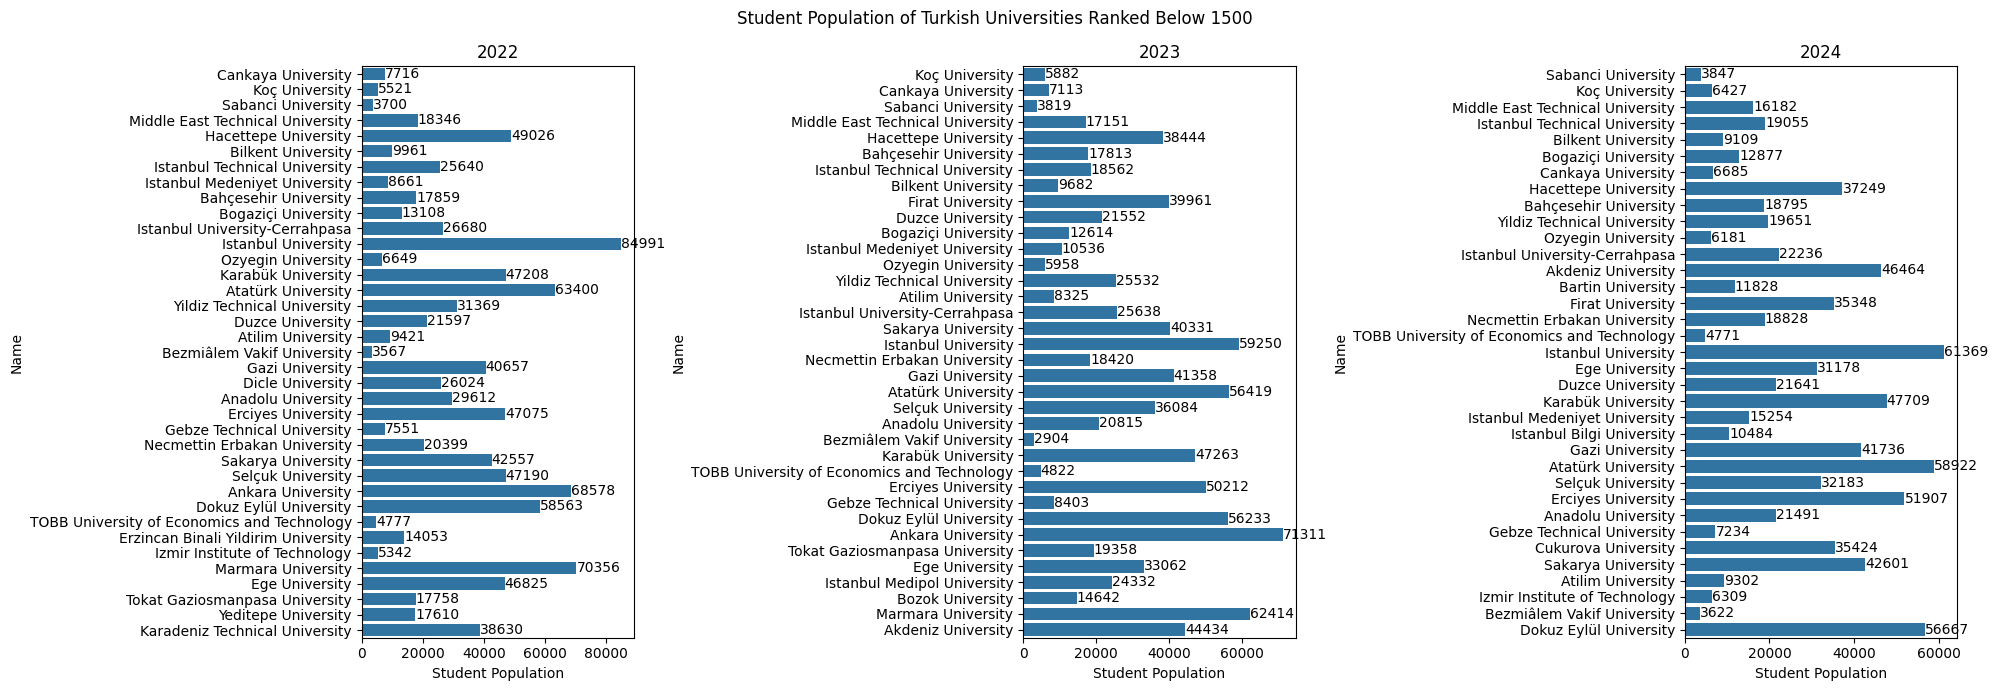

In [22]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Plot the 2022 data
ax = sns.barplot(x=year_2022['Student Population'], y=year_2022['Name'], ax=axes[0])
ax.bar_label(axes[0].containers[0])
axes[0].set_title('2022')

# Plot the 2023 data
ax = sns.barplot(x=year_2023['Student Population'], y=year_2023['Name'], ax=axes[1])
ax.bar_label(axes[1].containers[0])
axes[1].set_title('2023')

# Plot the 2024 data
ax = sns.barplot(x=year_2024['Student Population'], y=year_2024['Name'], ax=axes[2])
ax.bar_label(axes[2].containers[0])
axes[2].set_title('2024')

# Add a common title for the figure
plt.suptitle('Student Population of Turkish Universities Ranked Below 1500')

# Adjust the layout
plt.tight_layout()

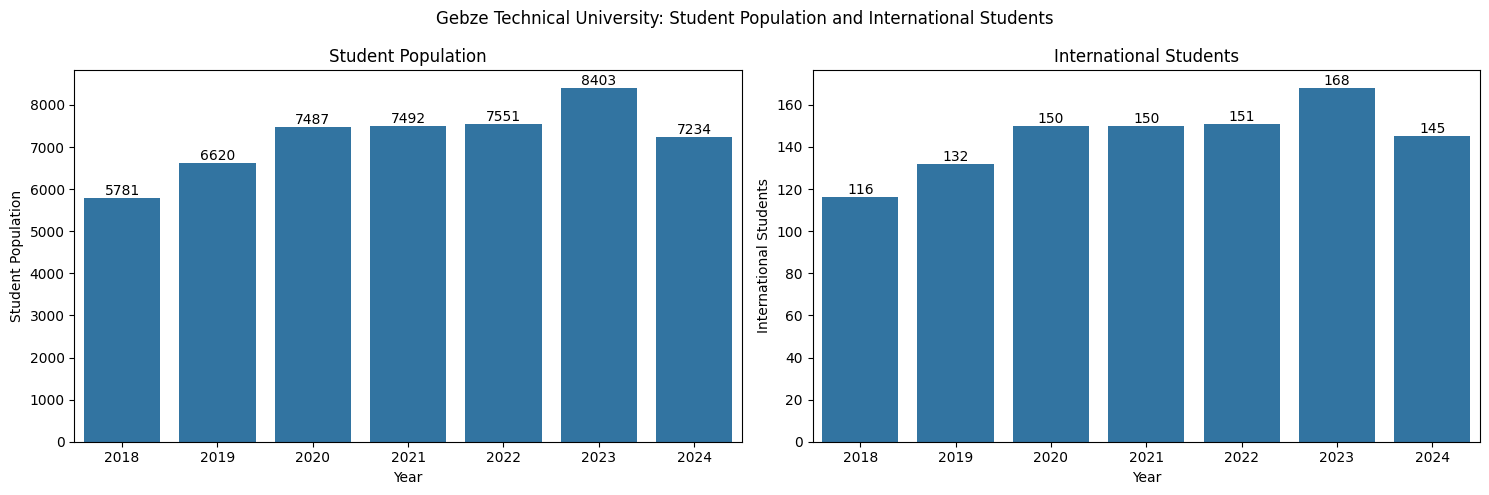

In [23]:
# Filter the data to get the information for Gebze Technical University
filtered_university = df[df['Name'] == 'Gebze Technical University']

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the student population for Gebze Technical University
ax = sns.barplot(y=filtered_university['Student Population'], x=filtered_university['Year'], ax=axes[0])
ax.bar_label(axes[0].containers[0])
axes[0].set_title('Student Population')

# Plot the international students for Gebze Technical University
ax = sns.barplot(y=filtered_university['International Students'], x=filtered_university['Year'], ax=axes[1])
ax.bar_label(axes[1].containers[0])
axes[1].set_title('International Students')

# Set the overall title for the figure
plt.suptitle('Gebze Technical University: Student Population and International Students')

# Adjust the layout
plt.tight_layout() 

#### Step V. Correlation Analysis

In [24]:
# Calculate the correlation matrix for the numeric columns in the DataFrame
df.corr(numeric_only=True)

Rank  Student Population  \
Rank                     1.000000            0.009288   
Student Population       0.009288            1.000000   
Students to Staff Ratio  0.001215            0.691228   
International Students  -0.486913            0.264406   
Female to Male Ratio     0.020724            0.008963   
Overall Score           -0.865406           -0.012367   
Teaching                -0.656169           -0.016301   
Research Environment    -0.717568            0.014222   
Research Quality        -0.826676           -0.015748   
Industry Impact         -0.440003           -0.001781   
International Outlook   -0.592422           -0.047217   
Year                     0.361494           -0.026461   

                         Students to Staff Ratio  International Students  \
Rank                                    0.001215               -0.486913   
Student Population                      0.691228                0.264406   
Students to Staff Ratio                 1.000000                0.135890   
International Students                  0.135890                1.000000   
Female to Male Ratio                    0.014093                0.030152   
Overall Score                          -0.026820                0.556544   
Teaching                               -0.112766                0.454092   
Research Environment                   -0.000987                0.547072   
Research Quality                        0.000714                0.416480   
Industry Impact                         0.022277                0.211504   
International Outlook                   0.007265                0.609610   
Year                                   -0.019038               -0.060739   

                         Female to Male Ratio  Overall Score  Teaching  \
Rank                                 0.020724      -0.865406 -0.656169   
Student Population                   0.008963      -0.012367 -0.016301   
Students to Staff Ratio              0.014093      -0.026820 -0.112766   
International Students               0.030152       0.556544  0.454092   
Female to Male Ratio                 1.000000      -0.013554 -0.043773   
Overall Score                       -0.013554       1.000000  0.839573   
Teaching                            -0.043773       0.839573  1.000000   
Research Environment                -0.058495       0.898838  0.893647   
Research Quality                     0.025791       0.876867  0.528316   
Industry Impact                     -0.122250       0.475429  0.474251   
International Outlook                0.063606       0.645225  0.373046   
Year                                 0.042373      -0.024008 -0.058149   

                         Research Environment  Research Quality  \
Rank                                -0.717568         -0.826676   
Student Population                   0.014222         -0.015748   
Students to Staff Ratio             -0.000987          0.000714   
International Students               0.547072          0.416480   
Female to Male Ratio                -0.058495          0.025791   
Overall Score                        0.898838          0.876867   
Teaching                             0.893647          0.528316   
Research Environment                 1.000000          0.601976   
Research Quality                     0.601976          1.000000   
Industry Impact                      0.553245          0.267336   
International Outlook                0.513392          0.576993   
Year                                -0.065097          0.010223   

                         Industry Impact  International Outlook      Year  
Rank                           -0.440003              -0.592422  0.361494  
Student Population             -0.001781              -0.047217 -0.026461  
Students to Staff Ratio         0.022277               0.007265 -0.019038  
International Students          0.211504               0.609610 -0.060739  
Female to Male Ratio           -0.122250               0.063606  0.042373  
Overall

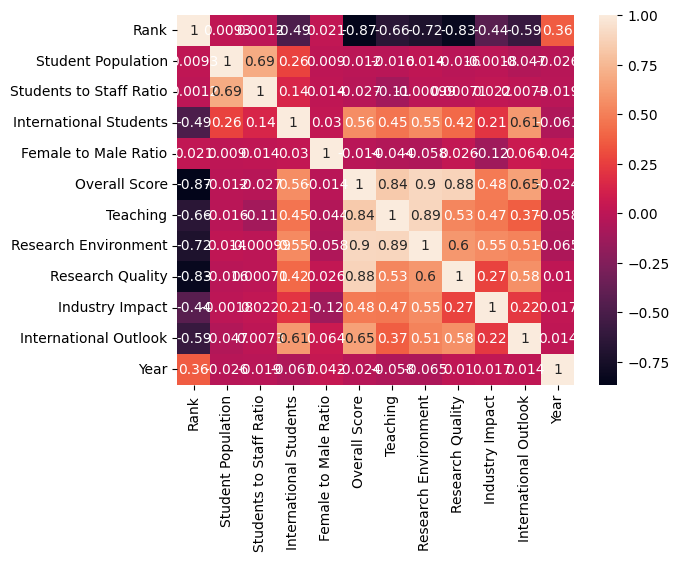

In [25]:
# Create a heatmap visualization of the correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True);

#### Data Preparation

In [26]:
# Filter the data frame to get the 2024 data (filtered_country = df[df['Country'] == 'Turkey'])
year_2024 = filtered_country[filtered_country['Year'] == 2024]

In [27]:
# Clustering the universities based on these features can help identify groups with similar characteristics
x=year_2024[['Rank','International Outlook','Teaching','Research Environment','Research Quality','Overall Score']]

In [28]:
# Select a random sample of 5 rows from the 'x' DataFrame
x.sample(5)

Rank  International Outlook  Teaching  Research Environment  \
12097  1572.0                   44.0      14.6                  10.6   
12102  1577.0                   25.6      23.5                   9.8   
12135  1610.0                   32.1      17.1                   8.6   
12276  1751.0                   32.0      14.5                   9.5   
11393   868.0                   40.9      32.1                  28.0   

       Research Quality  Overall Score  
12097              33.3        21.4950  
12102              29.9        21.4085  
12135              33.7        20.7560  
12276              22.8        16.9845  
11393              41.2        35.5810

#### Data Modeling

In [29]:
# For K-Means clustering
from sklearn.cluster import KMeans

In [30]:
# Initialize a k-means clustering model with 3 clusters
model=KMeans(3)

In [31]:
# Fit the k-means model to the 'x' DataFrame
model=model.fit(x)

In [32]:
# Make predictions using the fitted k-means model
prediction=model.predict(x)
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
# Add a new column 'cluster' to the 'x' DataFrame, which contains the cluster assignments for each data point
x['cluster']=prediction

In [34]:
x.sample(4)

Rank  International Outlook  Teaching  Research Environment  \
11250   725.0                   50.6      26.1                  26.6   
11072   547.0                   45.8      35.8                  36.6   
10924   399.0                   56.0      44.2                  43.1   
12114  1589.0                   30.3      25.8                  12.0   

       Research Quality  Overall Score  cluster  
11250              57.4        38.8125        2  
11072              51.8        43.6420        2  
10924              53.6        49.0940        2  
12114              22.7        21.1415        0

In [35]:
# Rename the columns 'Overall Score' and 'Research Quality' 
x.rename(columns={'Overall Score': 'Overall_Score','Research Quality': 'Research_Quality'}, inplace=True)

#### Model Evaluation

In [36]:
# For evaluating clustering quality
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clustering results
silhouette_score(x,prediction)

0.6313889791479037

In [37]:
# Within-cluster sum of squares (WCSS)
wcss = []

# Silhouette scores
ss = []

# Loop through different number of clusters 
for i in range(2, 8):
    # Create a K-Means model with i clusters
    model = KMeans(n_clusters=i)
    
    # Fit the model to the data
    model.fit(x)
    
    # Predict the cluster assignments
    prediction = model.predict(x)
    
    # Calculate the silhouette score
    ssl = silhouette_score(x, prediction)
    ss.append(ssl)
    
    # Print the number of clusters and the silhouette score
    print(f"Number of clusters = {i}, Silhouette score: {ssl}")
    
    # Append the WCSS to the list
    wcss.append(model.inertia_)

Number of clusters = 2, Silhouette score: 0.6254504117213809
Number of clusters = 3, Silhouette score: 0.633666072225778
Number of clusters = 4, Silhouette score: 0.5481401284863148
Number of clusters = 5, Silhouette score: 0.5649182713790428
Number of clusters = 6, Silhouette score: 0.5572711774466483
Number of clusters = 7, Silhouette score: 0.5792686664474337


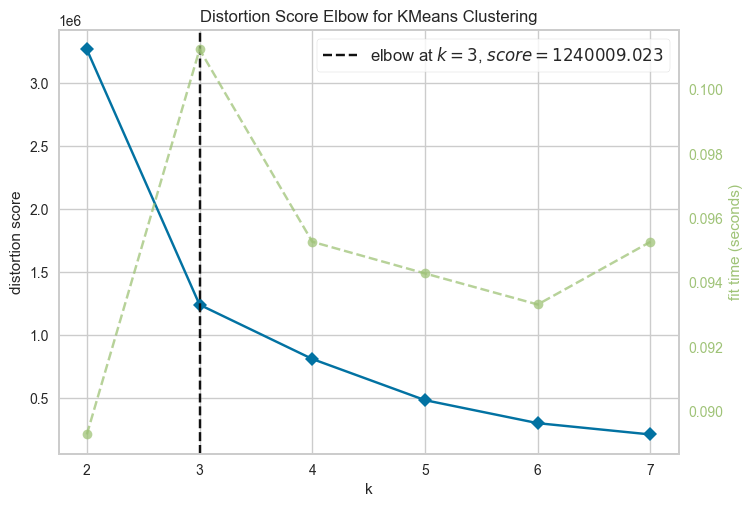

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# For determining the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Create a k-means model
km = KMeans()

# Create a k-elbow visualizer
vis = KElbowVisualizer(km, k=(2,8))

# Fit the visualizer to the data
vis.fit(x)

# Display the visualization
vis.show()

In [39]:
# For hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Ward's method
data=linkage(x,method='ward',metric='euclidean')

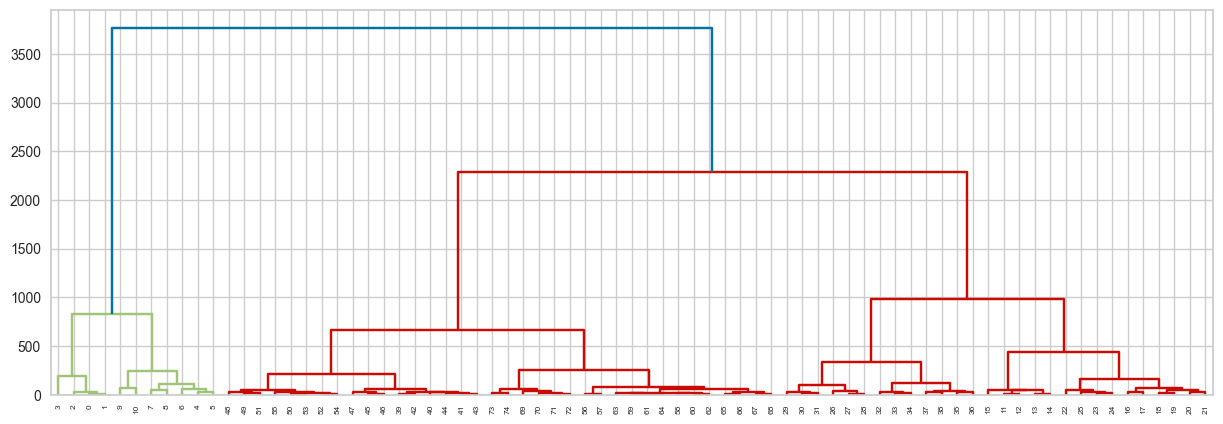

In [40]:
# Create a figure with size 15x5 inches
plt.figure(figsize=(15,5))
# Plot the dendrogram
dendrogram(data);

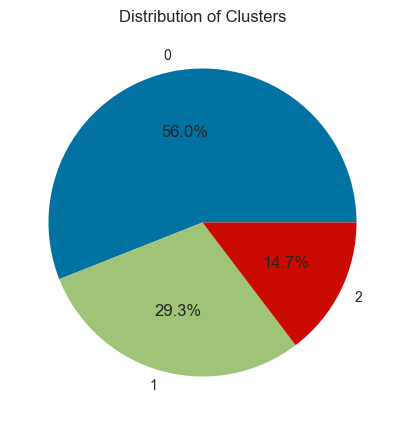

In [44]:
# Get the cluster counts
cluster_counts = x['cluster'].value_counts()

# Create the Pie chart
plt.figure(figsize=(10,5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Distribution of Clusters');

In [45]:
# Add the 'Country' column from the original DataFrame 'df' to the DataFrame 'x'
x['Country']=df['Country']
# Add the 'Name' column from the original DataFrame 'df' to the DataFrame 'x'
x['Name'] = df['Name']

In [46]:
# Filter the DataFrame 'x' to get the rows where 'cluster' is 0
cluster0=x[x['cluster']==0]
cluster0

Rank  International Outlook  Teaching  Research Environment  \
11989  1464.0                   27.2      30.4                  11.9   
11998  1473.0                   25.5      19.4                  18.2   
12033  1508.0                   32.5      16.7                  11.2   
12055  1530.0                   56.9      17.0                   9.2   
12058  1533.0                   21.4      21.7                  22.8   
12070  1545.0                   34.4      18.2                  11.6   
12097  1572.0                   44.0      14.6                  10.6   
12100  1575.0                   21.9      30.3                  16.9   
12102  1577.0                   25.6      23.5                   9.8   
12103  1578.0                   39.5      15.6                  10.8   
12104  1579.0                   30.7      17.0                  11.7   
12114  1589.0                   30.3      25.8                  12.0   
12129  1604.0                   35.5      11.6                  11.6   
12135  1610.0                   32.1      17.1                   8.6   
12141  1616.0                   38.8      22.0                  12.4   
12163  1638.0                   27.0      21.5                  16.6   
12175  1650.0                   23.7      12.0                   8.7   
12183  1658.0                   35.4      19.2                  12.6   
12184  1659.0                   22.7      19.3                  10.1   
12191  1666.0                   28.9      16.1                   9.4   
12192  1667.0                   36.1      19.0                  11.4   
12200  1675.0                   32.4      15.6                   9.3   
12213  1688.0                   29.7      13.7                   9.4   
12233  1708.0                   32.3      18.8                  10.4   
12243  1718.0                   29.7      14.9                   9.5   
12261  1736.0                   26.4      12.5                  11.2   
12272  1747.0                   22.3      16.3                   9.5   
12273  1748.0                   18.8      14.3                  18.8   
12276  1751.0                   32.0      14.5                   9.5   
12277  1752.0                   22.0      20.0                  12.2   
12278  1753.0                   41.0      12.5                   9.5   
12279  1754.0                   27.7      13.5                   9.4   
12288  1763.0                   21.1      17.8                   9.4   
12297  1772.0                   25.8      14.3                   9.7   
12308  1783.0                   28.0      11.6                   8.8   
12311  1786.0                   38.5      10.9                   7.8   
12337  1812.0                   37.3      11.8                   9.8   
12349  1824.0                   17.9      14.0                  10.3   
12361  1836.0                   22.0      14.9                   5.2   
12371  1846.0                   20.4      15.2                   9.5   
12387  1862.0                   22.8      15.2                   9.8   
12396  1871.0                   32.1      11.4                  10.4   

       Research_Quality  Overall_Score  cluster Country  \
11989              26.9        23.3930        0  Turkey   
11998              25.5        23.2475        0  Turkey   
12033              36.7        22.6700        0  Turkey   
12055              32.3        22.2725        0  Turkey   
12058              19.3        22.2245        0  Turkey   
12070              30.5        21.9270        0  Turkey   
12097              33.3        21.4950        0  Turkey   
12100              12.7        21.4120        0  Turkey   
12102              29.9        21.4085        0  Turkey   
12103              33.0        21.4005        0  Turkey   
12104              31.9        21.3565        0  Turkey   
12114              22.7        21.1415        0  Turkey   
12129              35.8        20.8245        0  Turkey   
12135              33.7        20.7560        0  Turkey   
12141              17.6    

In [47]:
# Filter the DataFrame 'x' to get the rows where 'cluster' is 1
cluster1=x[x['cluster']==1]
cluster1

Rank  International Outlook  Teaching  Research Environment  \
11574  1049.0                   26.9      26.0                  24.1   
11578  1053.0                   25.2      22.7                  27.3   
11582  1057.0                   37.4      11.1                  13.0   
11588  1063.0                   31.5      19.2                  10.3   
11615  1090.0                   38.7      37.2                  14.1   
11691  1166.0                   40.5      17.9                  14.3   
11709  1184.0                   38.2      23.5                  22.0   
11732  1207.0                   25.7      32.7                  16.7   
11735  1210.0                   30.2      15.5                  19.9   
11745  1220.0                   48.2      12.6                   9.4   
11765  1240.0                   25.9      14.5                  11.7   
11787  1262.0                   62.8      18.7                  11.7   
11798  1273.0                   21.7      25.6                  19.0   
11804  1279.0                   25.5      19.1                  16.7   
11818  1293.0                   34.1      22.4                  14.4   
11844  1319.0                   29.3      20.9                  16.1   
11873  1348.0                   32.7      22.3                  11.8   
11880  1355.0                   29.2      22.6                  13.8   
11915  1390.0                   28.9      23.8                  23.4   
11927  1402.0                   28.4      16.5                  10.6   
11929  1404.0                   45.3      18.4                   9.7   
11974  1449.0                   35.5      20.2                  15.1   

       Research_Quality  Overall_Score  cluster Country  \
11574              41.7        31.5785        1  Turkey   
11578              42.6        31.4715        1  Turkey   
11582              69.6        31.3815        1  Turkey   
11588              64.5        31.1515        1  Turkey   
11615              39.0        30.5215        1  Turkey   
11691              48.2        28.8770        1  Turkey   
11709              34.4        28.5335        1  Turkey   
11732              30.4        28.0730        1  Turkey   
11735              44.7        28.0465        1  Turkey   
11745              57.2        27.8620        1  Turkey   
11765              56.9        27.4350        1  Turkey   
11787              42.6        27.0515        1  Turkey   
11798              32.7        26.9115        1  Turkey   
11804              45.0        26.8700        1  Turkey   
11818              36.7        26.6795        1  Turkey   
11844              36.1        26.1420        1  Turkey   
11873              41.2        25.6930        1  Turkey   
11880              37.6        25.5390        1  Turkey   
11915              26.2        24.9025        1  Turkey   
11927              45.4        24.6515        1  Turkey   
11929              38.4        24.6265        1  Turkey   
11974              27.8        23.6085        1  Turkey   

                                              Name  
11574               Istanbul University-Cerrahpasa  
11578                           Akdeniz University  
11582                            Bartin University  
11588                             Firat University  
11615                 Necmettin Erbakan University  
11691  TOBB University of Economics and Technology  
11709                          Istanbul University  
11732                               Ege University  
11735                             Duzce University  
11745                           Karabük University  
11765                Istanbul Medeniyet University  
11787                    Istanbul Bilgi University  
11798                              Gazi University  
11804                           Atatürk University  
11818                            Selçuk University  
11844                           Erciyes University  
11873                           Anadolu University  
11880                   Gebze Technical 

In [48]:
# Filter the DataFrame 'x' to get the rows where 'cluster' is 2
cluster2=x[x['cluster']==2]
cluster2

Rank  International Outlook  Teaching  Research Environment  \
10905  380.0                   66.6      31.7                  37.9   
10907  382.0                   57.4      31.8                  40.5   
10924  399.0                   56.0      44.2                  43.1   
11072  547.0                   45.8      35.8                  36.6   
11228  703.0                   70.0      27.8                  26.0   
11250  725.0                   50.6      26.1                  26.6   
11271  746.0                   51.0      14.0                  15.4   
11301  776.0                   27.5      32.5                  26.8   
11332  807.0                   61.2      19.5                  24.4   
11393  868.0                   40.9      32.1                  28.0   
11453  928.0                   57.7      16.3                  23.9   

       Research_Quality  Overall_Score  cluster Country  \
10905              69.5        49.7955        2  Turkey   
10907              68.9        49.7770        2  Turkey   
10924              53.6        49.0940        2  Turkey   
11072              51.8        43.6420        2  Turkey   
11228              48.8        39.2870        2  Turkey   
11250              57.4        38.8125        2  Turkey   
11271              83.4        38.1210        2  Turkey   
11301              50.4        37.4820        2  Turkey   
11332              59.4        36.8225        2  Turkey   
11393              41.2        35.5810        2  Turkey   
11453              53.5        34.4370        2  Turkey   

                                   Name  
10905                Sabanci University  
10907                    Koç University  
10924  Middle East Technical University  
11072     Istanbul Technical University  
11228                Bilkent University  
11250               Bogaziçi University  
11271                Cankaya University  
11301              Hacettepe University  
11332             Bahçesehir University  
11393       Yildiz Technical University  
11453                Ozyegin University

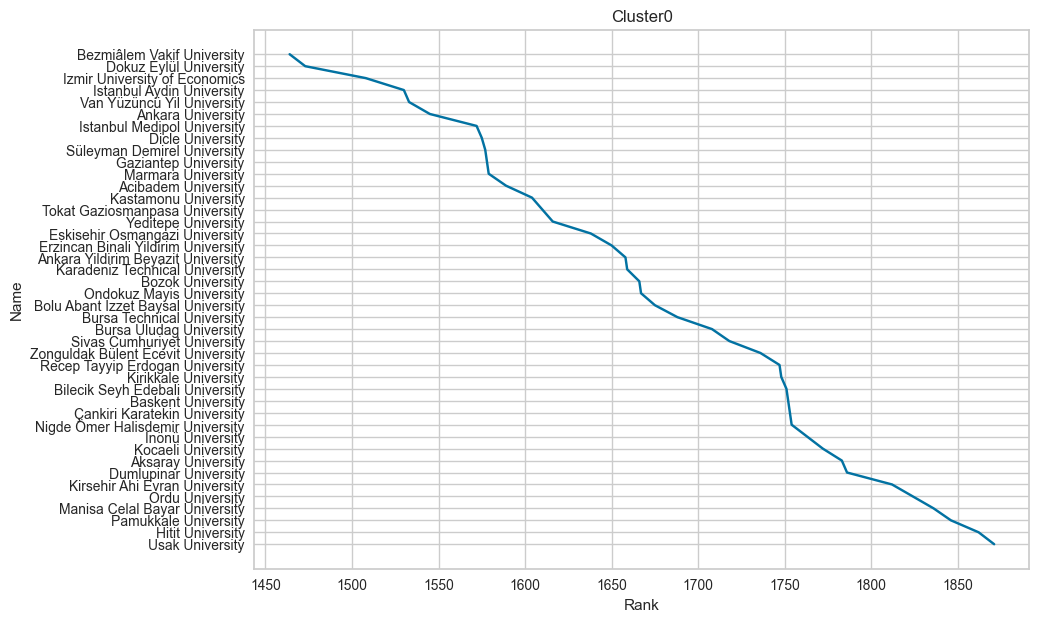

In [49]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='Rank', y='Name', data=cluster0)

plt.title('Cluster0')
plt.ylabel('Name')
plt.xlabel('Rank');

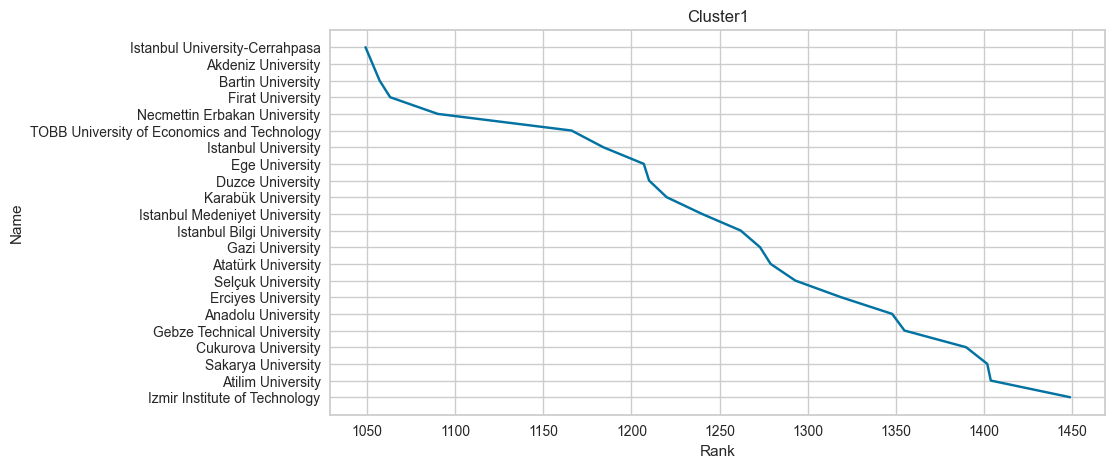

In [50]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Rank', y='Name', data=cluster1)

plt.title('Cluster1')
plt.ylabel('Name')
plt.xlabel('Rank');

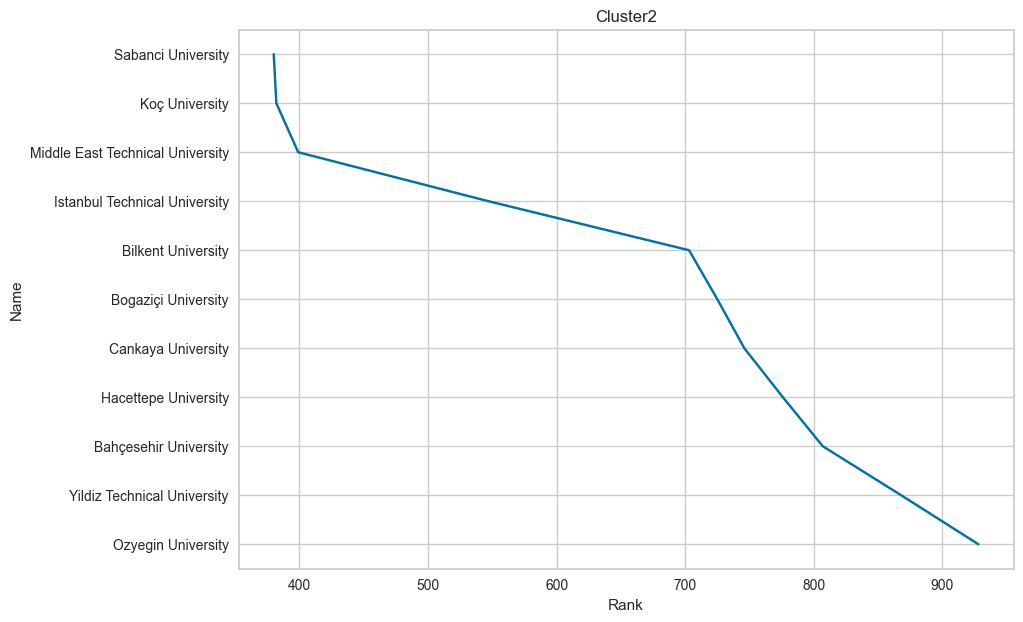

In [51]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='Rank', y='Name', data=cluster2)

plt.title('Cluster2')
plt.ylabel('Name')
plt.xlabel('Rank');

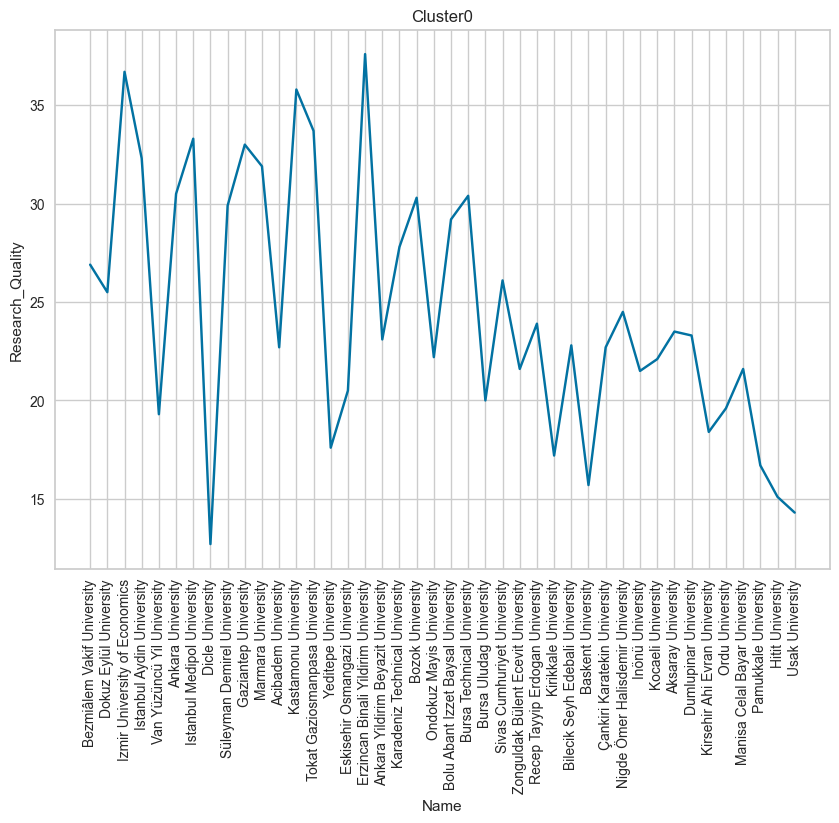

In [52]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='Research_Quality', x='Name', data=cluster0)

plt.title('Cluster0')
plt.xlabel('Name')
plt.ylabel('Research_Quality')
plt.xticks(rotation=90);

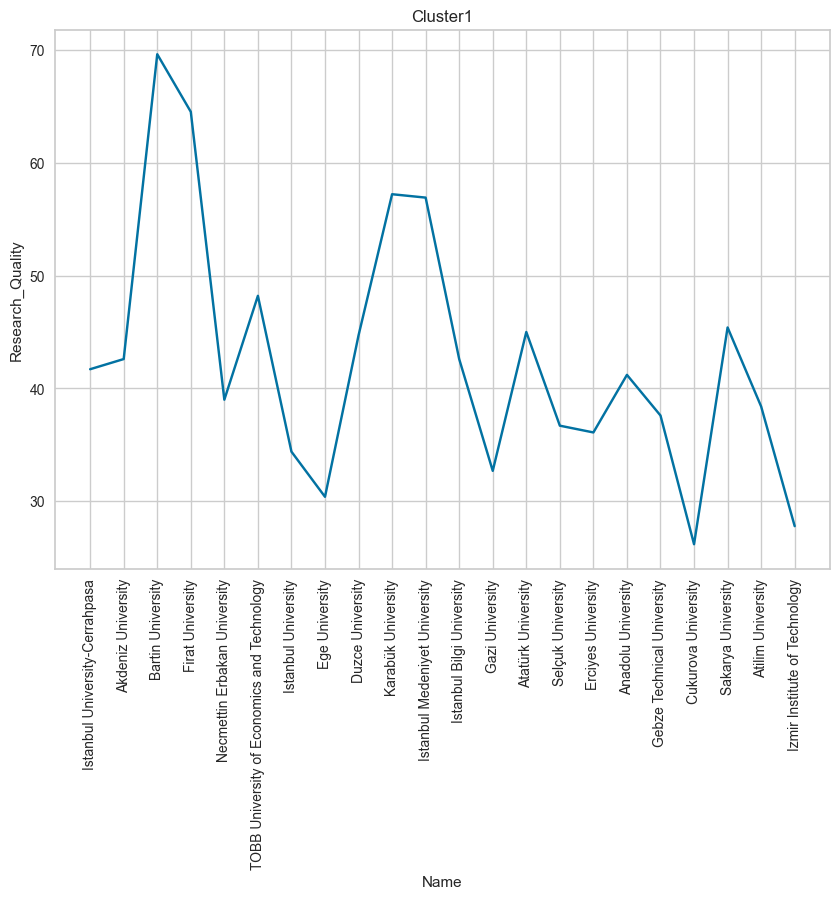

In [53]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='Research_Quality', x='Name', data=cluster1)

plt.title('Cluster1')
plt.xlabel('Name')
plt.ylabel('Research_Quality')
plt.xticks(rotation=90);

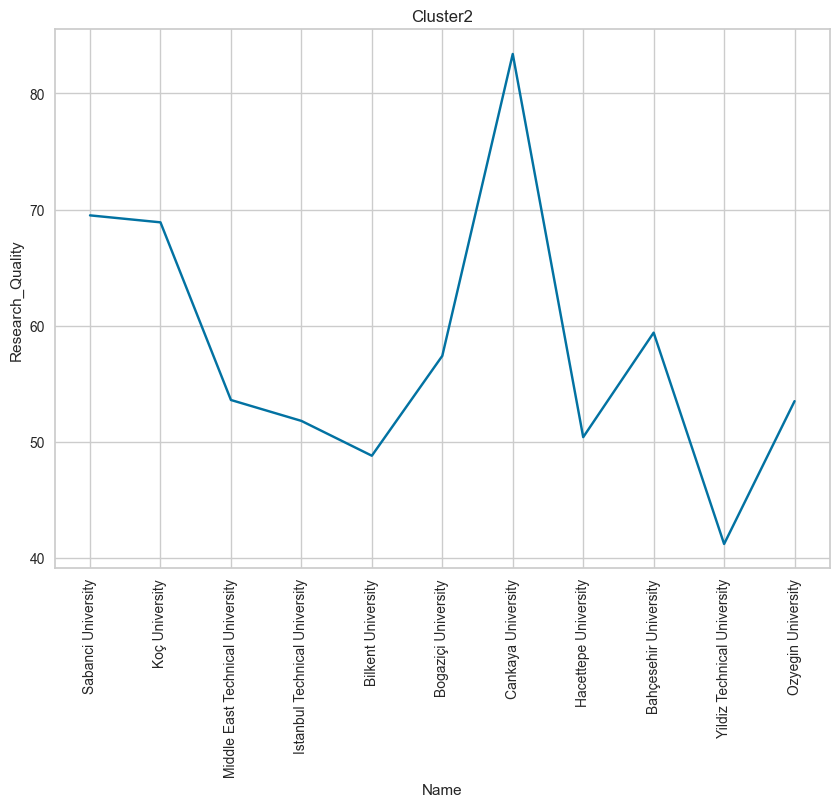

In [54]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='Research_Quality', x='Name', data=cluster2)

plt.title('Cluster2')
plt.xlabel('Name')
plt.ylabel('Research_Quality')
plt.xticks(rotation=90);

Cluster0 contains the universities in Turkiye with lower scores.

Cluster1 contains the universities in Turkiye with mid-range scores.

Cluster2 contains the universities in Turkiye with the highest scores.